## Imports

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import fiona

import matplotlib.pyplot as plt
import seaborn as sns

import re

sns.set(color_codes=True)

## Extract Coco Trees

In [2]:
datafile = '../data/tree_coconuts/Kolovai-Trees-20180108.shp'

possible_tags = set()

coll_list = []

with fiona.drivers():
    with fiona.open(datafile) as source:
        for coll in source:
            coll_list.append(coll)
            possible_tags.add(coll['properties']['other_tags'])

possible_tags

{'"access"=>"private"',
 '"genus"=>"Cocos nucifera","natural"=>"tree"',
 '"genus"=>"Cocos","natural"=>"tree","species"=>"Cocos nucifera L.","trees"=>"coconut_palms"',
 '"genus"=>"Mangifera","natural"=>"tree","species"=>"Mangifera indica L.","trees"=>"mango_trees"',
 '"genus"=>"Mangifera","natural"=>"tree","species"=>"Mangifera indica","trees"=>"mango_trees"',
 '"genus"=>"Musa","natural"=>"tree"',
 '"genus"=>"Musa","natural"=>"tree","species"=>"Musaceae"',
 '"genus"=>"Musa","natural"=>"tree","trees"=>"banana_plants"',
 '"genus"=>"musa","natural"=>"tree"',
 '"leaf_cycle"=>"evergreen","leaf_type"=>"needleleaved","natural"=>"tree","species"=>"Cocos nucifera"',
 '"natural"=>"tree"',
 '"natural"=>"tree","species"=>"Carica papaya"',
 '"natural"=>"tree","species"=>"Carica tree"',
 '"natural"=>"tree","species"=>"Cocos c"',
 '"natural"=>"tree","species"=>"Cocos nucifera"',
 '"natural"=>"tree","species"=>"Cocus nucifera"',
 '"natural"=>"tree","species"=>"Mangifera indica"',
 '"natural"=>"tree","s

In [3]:
mango_trees = []

for coll in coll_list:
    if coll['properties']['other_tags'] is None:
        continue
    elif 'mangifera' in coll['properties']['other_tags'].lower():
        x,y = coll['geometry']['coordinates']
        mango_trees.append({'x': x, 'y': y})

mango_trees = pd.DataFrame(mango_trees)

mango_trees.to_csv('../data/tree_mangoes/locations.json')

## Preliminary EDA

In [4]:
print("Number of labeled trees:", mango_trees.shape[0])

Number of labeled trees: 261


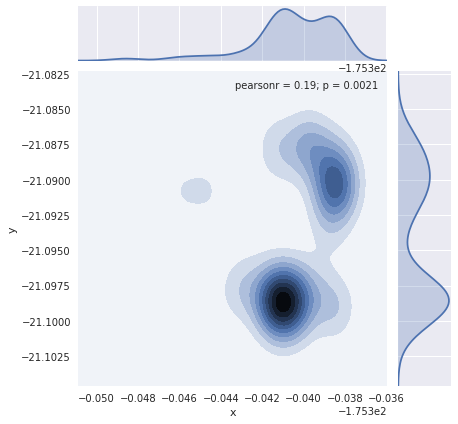

In [5]:
sns.jointplot(x="x", y="y", data=mango_trees, kind="kde")